# Project 2: To be, or not to be...
---
Libraries for manipulating our data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from collections import Counter

---
Load our data

In [2]:
data = pd.read_csv('../data/raw/Shakespeare_data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111396 entries, 0 to 111395
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Dataline          111396 non-null  int64  
 1   Play              111396 non-null  object 
 2   PlayerLinenumber  111393 non-null  float64
 3   ActSceneLine      105153 non-null  object 
 4   Player            111389 non-null  object 
 5   PlayerLine        111396 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 5.1+ MB


In [4]:
data.head()

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,1,Henry IV,NaN,NaN,NaN,ACT I
1,2,Henry IV,NaN,NaN,NaN,SCENE I. London. The palace.
2,3,Henry IV,NaN,NaN,NaN,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ..."
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"


---
Some of the data clean up borrowed from:
https://www.kaggle.com/mallaham/network-analysis-of-shakespeare-plays

In [5]:
data['Player'].replace(np.nan, 'Other', inplace = True)
data.head(5)

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,1,Henry IV,NaN,NaN,Other,ACT I
1,2,Henry IV,NaN,NaN,Other,SCENE I. London. The palace.
2,3,Henry IV,NaN,NaN,Other,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ..."
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"


In [6]:
data = data[~data['Player'].str.startswith('Other')]
data = data.replace(r'[,\\.:!?\']','', regex=True)
data['PlayerLine'] = data['PlayerLine'].str.lower()
data

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
3,4,Henry IV,1.0,111,KING HENRY IV,so shaken as we are so wan with care
4,5,Henry IV,1.0,112,KING HENRY IV,find we a time for frighted peace to pant
5,6,Henry IV,1.0,113,KING HENRY IV,and breathe short-winded accents of new broils
6,7,Henry IV,1.0,114,KING HENRY IV,to be commenced in strands afar remote
7,8,Henry IV,1.0,115,KING HENRY IV,no more the thirsty entrance of this soil
...,...,...,...,...,...,...
111391,111392,A Winters Tale,38.0,53180,LEONTES,lead us from hence where we may leisurely
111392,111393,A Winters Tale,38.0,53181,LEONTES,each one demand an answer to his part
111393,111394,A Winters Tale,38.0,53182,LEONTES,performd in this wide gap of time since first
111394,111395,A Winters Tale,38.0,53183,LEONTES,we were disseverd hastily lead away


---
Total number of words in all plays.

In [7]:
count = data['PlayerLine'].str.split().str.len().sum()
print("There are {} total words.".format(count))

There are 814611 total words.


---
List the most common words found in all plays.

In [8]:
words = Counter(" ".join(data['PlayerLine']).split()).most_common(100)
words

[('the', 27025),
 ('and', 25024),
 ('i', 20081),
 ('to', 18327),
 ('of', 15846),
 ('a', 14025),
 ('you', 13288),
 ('my', 11863),
 ('in', 10497),
 ('that', 10397),
 ('is', 8835),
 ('not', 8204),
 ('me', 7451),
 ('it', 7451),
 ('with', 7388),
 ('for', 7326),
 ('be', 6643),
 ('his', 6512),
 ('your', 6500),
 ('this', 6424),
 ('he', 6127),
 ('but', 6018),
 ('have', 5735),
 ('as', 5497),
 ('thou', 5179),
 ('him', 5042),
 ('will', 4825),
 ('so', 4803),
 ('what', 4362),
 ('her', 3830),
 ('thy', 3726),
 ('no', 3659),
 ('do', 3631),
 ('all', 3626),
 ('by', 3589),
 ('shall', 3468),
 ('if', 3425),
 ('are', 3318),
 ('we', 3268),
 ('our', 3014),
 ('thee', 3011),
 ('on', 2914),
 ('good', 2703),
 ('now', 2699),
 ('lord', 2578),
 ('from', 2528),
 ('o', 2493),
 ('come', 2443),
 ('at', 2439),
 ('sir', 2428),
 ('well', 2410),
 ('they', 2385),
 ('or', 2321),
 ('would', 2243),
 ('she', 2225),
 ('more', 2218),
 ('which', 2176),
 ('was', 2157),
 ('how', 2102),
 ('am', 2095),
 ('then', 2094),
 ('here', 2065),


__This is not very interesting!__

---

Lets remove stop words as defined by:
http://ir.dcs.gla.ac.uk/resources/linguistic_utils/stop_words

We also need to remove trailing commas.

In [9]:
stopwords = ['a', 'about', 'above', 'across', 'after', 'afterwards']
stopwords += ['again', 'against', 'all', 'almost', 'alone', 'along']
stopwords += ['already', 'also', 'although', 'always', 'am', 'among']
stopwords += ['amongst', 'amoungst', 'amount', 'an', 'and', 'another']
stopwords += ['any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere']
stopwords += ['are', 'around', 'as', 'at', 'back', 'be', 'became']
stopwords += ['because', 'become', 'becomes', 'becoming', 'been']
stopwords += ['before', 'beforehand', 'behind', 'being', 'below']
stopwords += ['beside', 'besides', 'between', 'beyond', 'bill', 'both']
stopwords += ['bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant']
stopwords += ['co', 'computer', 'con', 'could', 'couldnt', 'cry', 'de']
stopwords += ['describe', 'detail', 'did', 'do', 'done', 'down', 'due']
stopwords += ['during', 'each', 'eg', 'eight', 'either', 'eleven', 'else']
stopwords += ['elsewhere', 'empty', 'enough', 'etc', 'even', 'ever']
stopwords += ['every', 'everyone', 'everything', 'everywhere', 'except']
stopwords += ['few', 'fifteen', 'fifty', 'fill', 'find', 'fire', 'first']
stopwords += ['five', 'for', 'former', 'formerly', 'forty', 'found']
stopwords += ['four', 'from', 'front', 'full', 'further', 'get', 'give']
stopwords += ['go', 'had', 'has', 'hasnt', 'have', 'he', 'hence', 'her']
stopwords += ['here', 'hereafter', 'hereby', 'herein', 'hereupon', 'hers']
stopwords += ['herself', 'him', 'himself', 'his', 'how', 'however']
stopwords += ['hundred', 'i', 'ie', 'if', 'in', 'inc', 'indeed']
stopwords += ['interest', 'into', 'is', 'it', 'its', 'itself', 'keep']
stopwords += ['last', 'latter', 'latterly', 'least', 'less', 'ltd', 'made']
stopwords += ['many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine']
stopwords += ['more', 'moreover', 'most', 'mostly', 'move', 'much']
stopwords += ['must', 'my', 'myself', 'name', 'namely', 'neither', 'never']
stopwords += ['nevertheless', 'next', 'nine', 'no', 'nobody', 'none']
stopwords += ['noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'of']
stopwords += ['off', 'often', 'on','once', 'one', 'only', 'onto', 'or']
stopwords += ['other', 'others', 'otherwise', 'our', 'ours', 'ourselves']
stopwords += ['out', 'over', 'own', 'part', 'per', 'perhaps', 'please']
stopwords += ['put', 'rather', 're', 's', 'same', 'see', 'seem', 'seemed']
stopwords += ['seeming', 'seems', 'serious', 'several', 'she', 'should']
stopwords += ['show', 'side', 'since', 'sincere', 'six', 'sixty', 'so']
stopwords += ['some', 'somehow', 'someone', 'something', 'sometime']
stopwords += ['sometimes', 'somewhere', 'still', 'such', 'system', 'take']
stopwords += ['ten', 'than', 'that', 'the', 'their', 'them', 'themselves']
stopwords += ['then', 'thence', 'there', 'thereafter', 'thereby']
stopwords += ['therefore', 'therein', 'thereupon', 'these', 'they']
stopwords += ['thick', 'thin', 'third', 'this', 'those', 'though', 'three']
stopwords += ['three', 'through', 'throughout', 'thru', 'thus', 'to']
stopwords += ['together', 'too', 'top', 'toward', 'towards', 'twelve']
stopwords += ['twenty', 'two', 'un', 'under', 'until', 'up', 'upon']
stopwords += ['us', 'very', 'via', 'was', 'we', 'well', 'were', 'what']
stopwords += ['whatever', 'when', 'whence', 'whenever', 'where']
stopwords += ['whereafter', 'whereas', 'whereby', 'wherein', 'whereupon']
stopwords += ['wherever', 'whether', 'which', 'while', 'whither', 'who']
stopwords += ['whoever', 'whole', 'whom', 'whose', 'why', 'will', 'with']
stopwords += ['within', 'without', 'would', 'yet', 'you', 'your']
stopwords += ['yours', 'yourself', 'yourselves']

In [10]:
words = Counter(" ".join(data['PlayerLine']).split())
for sw in stopwords:
    words.pop(sw, None)
words = words.most_common(150)
words

[('thou', 5179),
 ('thy', 3726),
 ('shall', 3468),
 ('thee', 3011),
 ('good', 2703),
 ('lord', 2578),
 ('o', 2493),
 ('come', 2443),
 ('sir', 2428),
 ('enter', 2024),
 ('let', 2020),
 ('ill', 1932),
 ('love', 1871),
 ('hath', 1841),
 ('man', 1752),
 ('like', 1664),
 ('know', 1630),
 ('say', 1608),
 ('make', 1581),
 ('king', 1491),
 ('tis', 1363),
 ('speak', 1131),
 ('tell', 1038),
 ('exeunt', 1029),
 ('think', 993),
 ('time', 970),
 ('exit', 954),
 ('heart', 909),
 ('great', 876),
 ('hear', 858),
 ('art', 852),
 ('death', 830),
 ('men', 829),
 ('away', 821),
 ('doth', 809),
 ('life', 802),
 ('hand', 798),
 ('father', 796),
 ('look', 787),
 ('scene', 763),
 ('ay', 762),
 ('true', 733),
 ('pray', 728),
 ('sweet', 716),
 ('god', 714),
 ('fair', 712),
 ('master', 701),
 ('lady', 675),
 ('day', 663),
 ('leave', 638),
 ('eyes', 633),
 ('heaven', 611),
 ('fear', 606),
 ('blood', 605),
 ('night', 602),
 ('honour', 602),
 ('till', 602),
 ('noble', 600),
 ('poor', 598),
 ('world', 592),
 ('old',

---
This is a little more interesting. We are getting to the language that we think of when we hear Shakespeare.

Some words look like 'Shakespeare' stop words. Lets try to remove those.
Borrowed from: https://github.com/BryanBumgardner/gutenburg_nlp/blob/master/stopwords_elizabethan

In [11]:
esw = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours']
esw += ['yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers']
esw += ['herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves']
esw += ['what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are']
esw += ['was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does']
esw += ['did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until']
esw += ['while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into']
esw += ['through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up']
esw += ['down', 'in', 'out', 'o', 'on', 'off', 'over', 'under', 'again', 'further', 'then']
esw += ['once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each']
esw += ['few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own']
esw += ['same', 'so', 'than', 'too', 'very', 'can', 'will', 'just', 'should', 'now', 'art']
esw += ['doth', 'dost', 'ere', 'hast', 'hath', 'hence', 'hither', 'nigh', 'oft', 'shouldst']
esw += ['thither', 'thee', 'thou', 'thine', 'thy', 'tis', 'twas', 'wast', 'whence']
esw += ['wherefore', 'whereto', 'withal', 'wouldst', 'ye', 'yon', 'yonder']

Some duplicate code here for readability.

In [12]:
words = Counter(" ".join(data['PlayerLine']).split())
for sw in stopwords:
    words.pop(sw, None)
for e in esw:
    words.pop(e, None)
words = words.most_common(50)
words

[('shall', 3468),
 ('good', 2703),
 ('lord', 2578),
 ('come', 2443),
 ('sir', 2428),
 ('enter', 2024),
 ('let', 2020),
 ('ill', 1932),
 ('love', 1871),
 ('man', 1752),
 ('like', 1664),
 ('know', 1630),
 ('say', 1608),
 ('make', 1581),
 ('king', 1491),
 ('speak', 1131),
 ('tell', 1038),
 ('exeunt', 1029),
 ('think', 993),
 ('time', 970),
 ('exit', 954),
 ('heart', 909),
 ('great', 876),
 ('hear', 858),
 ('death', 830),
 ('men', 829),
 ('away', 821),
 ('life', 802),
 ('hand', 798),
 ('father', 796),
 ('look', 787),
 ('scene', 763),
 ('ay', 762),
 ('true', 733),
 ('pray', 728),
 ('sweet', 716),
 ('god', 714),
 ('fair', 712),
 ('master', 701),
 ('lady', 675),
 ('day', 663),
 ('leave', 638),
 ('eyes', 633),
 ('heaven', 611),
 ('fear', 606),
 ('blood', 605),
 ('night', 602),
 ('honour', 602),
 ('till', 602),
 ('noble', 600)]

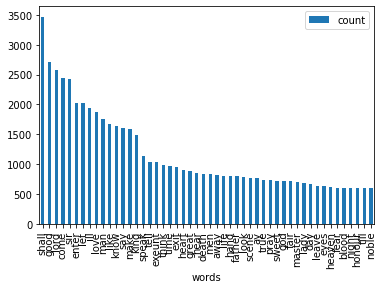

In [13]:
pd.DataFrame(words, columns=['words','count']).set_index('words').plot(kind='bar');